In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
filename = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"

In [3]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [4]:
df = pd.read_csv(filename, names=headers)

In [5]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [7]:
df.replace("?", np.nan, inplace=True)

In [8]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [10]:
missing_data = df.isnull()
missing_data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
201,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
202,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
203,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [18]:
for column in missing_data:
    print(column)
    print(missing_data[column].value_counts())
    print("")

symboling
symboling
False    205
Name: count, dtype: int64

normalized-losses
normalized-losses
False    164
True      41
Name: count, dtype: int64

make
make
False    205
Name: count, dtype: int64

fuel-type
fuel-type
False    205
Name: count, dtype: int64

aspiration
aspiration
False    205
Name: count, dtype: int64

num-of-doors
num-of-doors
False    203
True       2
Name: count, dtype: int64

body-style
body-style
False    205
Name: count, dtype: int64

drive-wheels
drive-wheels
False    205
Name: count, dtype: int64

engine-location
engine-location
False    205
Name: count, dtype: int64

wheel-base
wheel-base
False    205
Name: count, dtype: int64

length
length
False    205
Name: count, dtype: int64

width
width
False    205
Name: count, dtype: int64

height
height
False    205
Name: count, dtype: int64

curb-weight
curb-weight
False    205
Name: count, dtype: int64

engine-type
engine-type
False    205
Name: count, dtype: int64

num-of-cylinders
num-of-cylinders
False    205
Nam

In [22]:
avg_normal_loss = df["normalized-losses"].astype("float").mean()
avg_normal_loss

122.0

In [23]:
df.replace(np.nan, avg_normal_loss, inplace=True)

In [24]:
df["num-of-doors"].value_counts()

num-of-doors
four     114
two       89
122.0      2
Name: count, dtype: int64

In [25]:
df["num-of-doors"].value_counts().idxmax()

'four'

In [26]:
df["num-of-doors"].replace(np.nan, "four", inplace=True)

In [28]:
avg_bore = df["bore"].astype("float").mean()
avg_bore

5.645268292682926

In [29]:
df.replace(np.nan, avg_bore, inplace=True)

In [31]:
avg_stroke = df["stroke"].astype("float").mean()
avg_stroke

5.572390243902437

In [32]:
df.replace(np.nan, avg_stroke, inplace=True)

In [34]:
average_horsepower = df["horsepower"].astype("float").mean()
average_horsepower 

104.42926829268292

In [35]:
df.replace(np.nan, average_horsepower, inplace=True)

In [37]:
avg_peakrpm = df["peak-rpm"].astype("float").mean()
avg_peakrpm

5076.556097560976

In [38]:
df.replace(np.nan, avg_peakrpm, inplace=True)

In [43]:
df.dropna(subset=['price'], axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

In [44]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [45]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("float")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

In [46]:
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [47]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0


<Axes: xlabel='body-style', ylabel='price'>

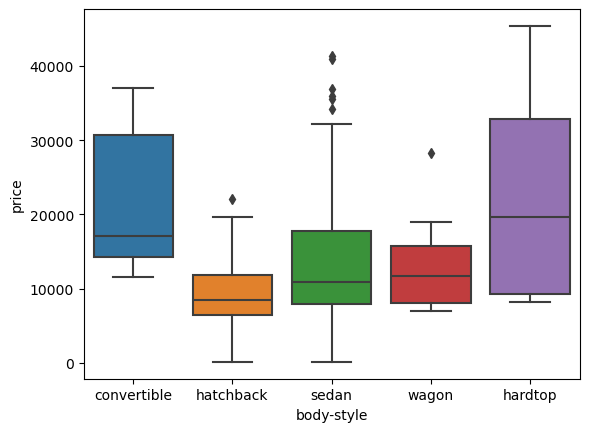

In [48]:
sns.boxplot(x='body-style', y='price', data=df)

(0.0, 52665.17648576741)

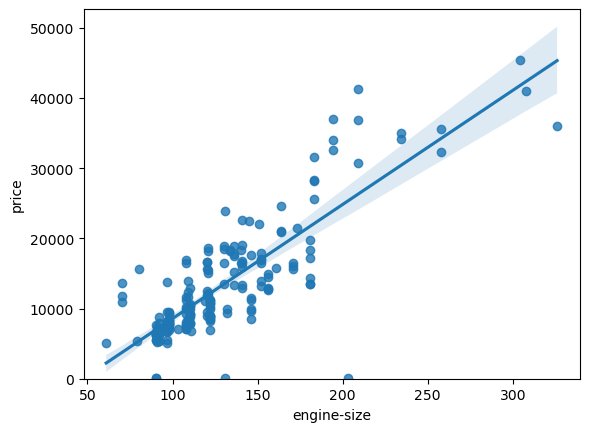

In [49]:
sns.regplot(x='engine-size', y='price', data=df)
plt.ylim(0,)

(0.0, 47663.9)

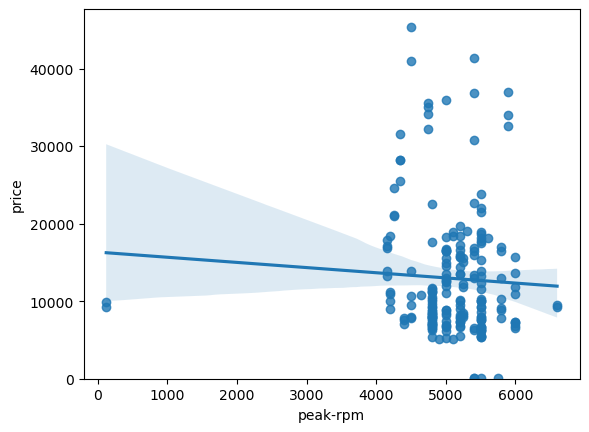

In [51]:
sns.regplot(x='peak-rpm', y='price', data=df)
plt.ylim(0,)

In [89]:
group_test = df[['drive-wheels','body-style','price']]
group_test1 = group_test.groupby(['drive-wheels','body-style'], as_index=False).mean()
group_test1

,drive-wheels,body-style,price
0,4wd,hatchback,3862.500000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9471.807018
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [91]:
pivot_table = group_test1.pivot(index='drive-wheels', columns='body-style')
pivot_table

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   3862.500000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9471.807018   
rwd              23949.6  24202.714286  13589.578947  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [93]:
pivot_table = pivot_table.fillna(0)
pivot_table

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   3862.500000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9471.807018   
rwd              23949.6  24202.714286  13589.578947  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

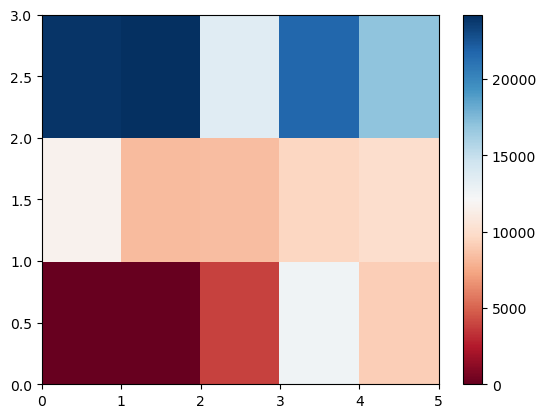

In [94]:
plt.pcolor(pivot_table, cmap='RdBu')
plt.colorbar()
plt.show()

In [54]:
X = df[["highway-mpg"]]
Y =df["price"]

In [57]:
lm = LinearRegression()
lm

LinearRegression()

In [58]:
lm.fit(X,Y)

LinearRegression()

In [59]:
lm.score(X,Y)

0.47315194282779705

In [62]:
Yhat=lm.predict(X)
Yhat[0:5]

array([15977.55601104, 15977.55601104, 16784.15936899, 13557.74593719,
       20010.57280079])

In [64]:
Z = df[["city-mpg", "engine-size", "curb-weight"]]
Y =df["price"]

In [67]:
lm1 = LinearRegression()
lm1

LinearRegression()

In [68]:
lm.fit(Z,Y)

LinearRegression()

In [69]:
lm.score(Z,Y)

0.7360131040523332

In [70]:
Yhat=lm.predict(Z)
Yhat[0:5]

array([13861.88955411, 13861.88955411, 17549.30147526, 10372.13733532,
       15934.52780285])

In [73]:
features = ["symboling", "wheel-base", "length", "width", "bore", "stroke", "compression-ratio"]
X = df[features]
Y = df["price"]

In [76]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
print("done")

done


In [77]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)

In [78]:
x_train.shape[0]


174

In [79]:
x_test.shape[0]

31

In [80]:
from sklearn.linear_model import Ridge

In [82]:
RidgeModel = Ridge(alpha=0.1)
RidgeModel.fit(X,Y)

Ridge(alpha=0.1)

In [83]:
RidgeModel.score(X,Y)

0.5496362269846773